# Real Estate Dataset

In [489]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

## Loading the dataset

In [490]:
data_raw=pd.read_csv("Real estate.csv")
data_raw.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


I dont think this 'No' column is important

In [491]:
data_1=data_raw.drop(["No"],axis=1)
data_1.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [492]:
data_1.nunique()

X1 transaction date                        12
X2 house age                              236
X3 distance to the nearest MRT station    259
X4 number of convenience stores            11
X5 latitude                               234
X6 longitude                              232
Y house price of unit area                270
dtype: int64

In [493]:
data_1.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## Preprocessing
### Check for Missing Values

In [494]:
data_1.isna().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### PDFs

C:\Users\Magesh\AppData\Local\Temp\ipykernel_15108\3497976059.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1["X1 transaction date"])


<AxesSubplot:xlabel='X1 transaction date', ylabel='Density'>

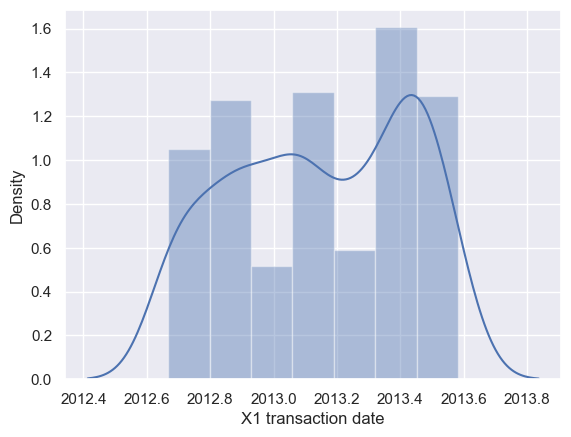

In [495]:
sns.distplot(data_1["X1 transaction date"])


C:\Users\Magesh\AppData\Local\Temp\ipykernel_15108\4068194938.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1["X2 house age"])


<AxesSubplot:xlabel='X2 house age', ylabel='Density'>

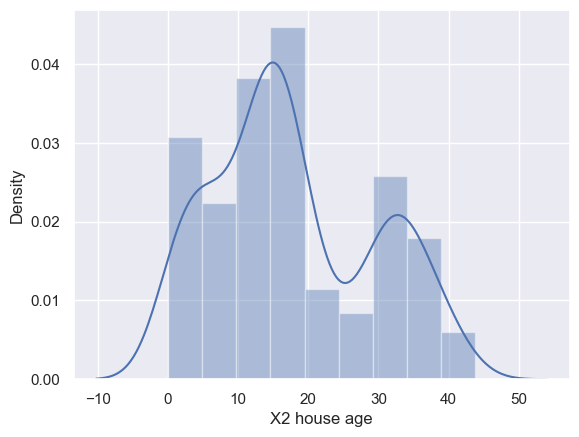

In [496]:
sns.distplot(data_1["X2 house age"])

C:\Users\Magesh\AppData\Local\Temp\ipykernel_15108\1882424124.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1["X3 distance to the nearest MRT station"])


<AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='Density'>

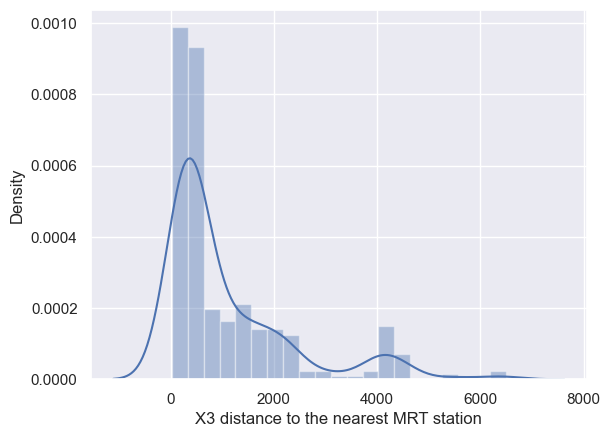

In [497]:
sns.distplot(data_1["X3 distance to the nearest MRT station"])


In [498]:
q=data_1["X3 distance to the nearest MRT station"].quantile(0.95)
data_2=data_1[data_1["X3 distance to the nearest MRT station"]<q]
data_2.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,389.000000,389.000000,389.000000,389.000000,389.000000,389.00000,389.000000
mean,2013.148476,17.475064,854.967535,4.334190,24.970484,121.53578,39.344730
std,0.281632,11.575408,888.522981,2.874773,0.011266,0.01217,12.861805
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.50243,7.600000
25%,2012.917000,8.300000,287.602500,2.000000,24.963570,121.53119,29.500000
50%,2013.167000,15.900000,482.758100,5.000000,24.972290,121.53964,39.600000
75%,2013.417000,28.200000,1264.730000,6.000000,24.978410,121.54348,47.100000
max,2013.583000,43.800000,4079.418000,10.000000,25.014590,121.56627,117.500000


C:\Users\Magesh\AppData\Local\Temp\ipykernel_15108\2857429013.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2["X3 distance to the nearest MRT station"])


<AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='Density'>

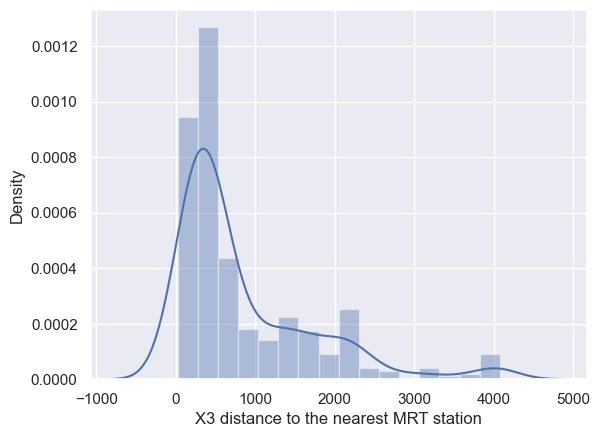

In [499]:
sns.distplot(data_2["X3 distance to the nearest MRT station"])

C:\Users\Magesh\AppData\Local\Temp\ipykernel_15108\51423159.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1["X4 number of convenience stores"])


<AxesSubplot:xlabel='X4 number of convenience stores', ylabel='Density'>

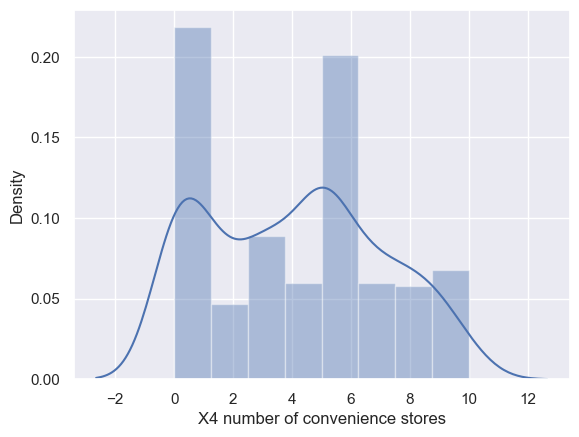

In [500]:
sns.distplot(data_1["X4 number of convenience stores"])


C:\Users\Magesh\AppData\Local\Temp\ipykernel_15108\1111392951.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1["X5 latitude"])


<AxesSubplot:xlabel='X5 latitude', ylabel='Density'>

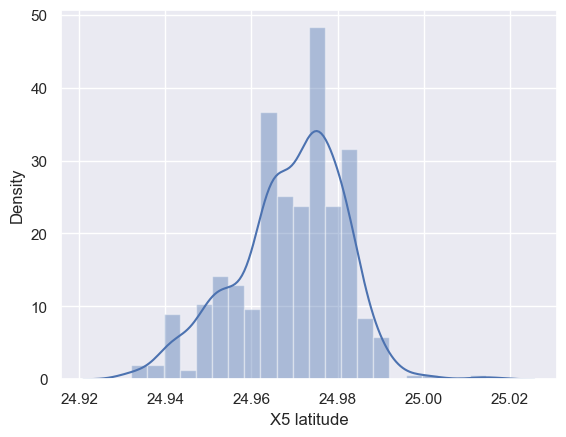

In [501]:
sns.distplot(data_1["X5 latitude"])


C:\Users\Magesh\AppData\Local\Temp\ipykernel_15108\2978212477.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1["X6 longitude"])


<AxesSubplot:xlabel='X6 longitude', ylabel='Density'>

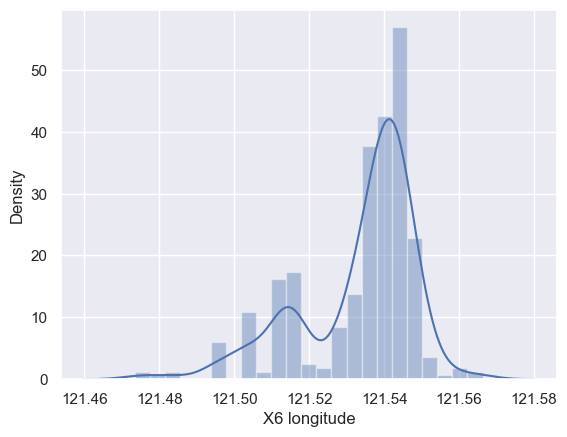

In [502]:
sns.distplot(data_1["X6 longitude"])

C:\Users\Magesh\AppData\Local\Temp\ipykernel_15108\4150990164.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2["Y house price of unit area"])


<AxesSubplot:xlabel='Y house price of unit area', ylabel='Density'>

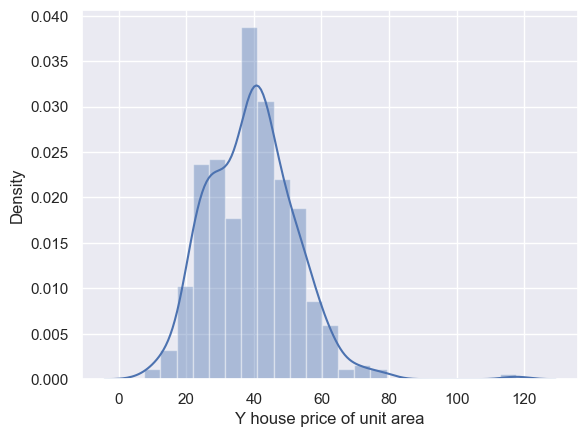

In [503]:
sns.distplot(data_2["Y house price of unit area"])

## OLS Assumptions
### 1. Linearity

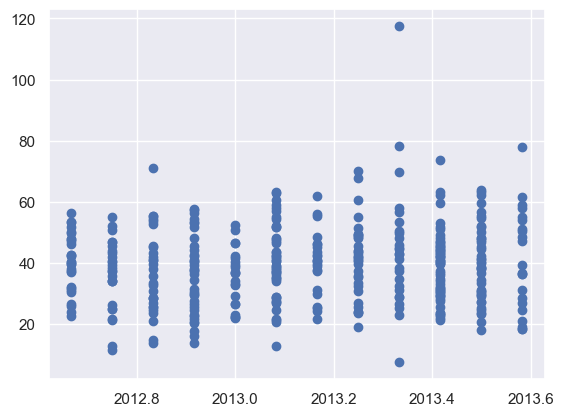

In [504]:
plt.scatter(data_2["X1 transaction date"],data_2["Y house price of unit area"])

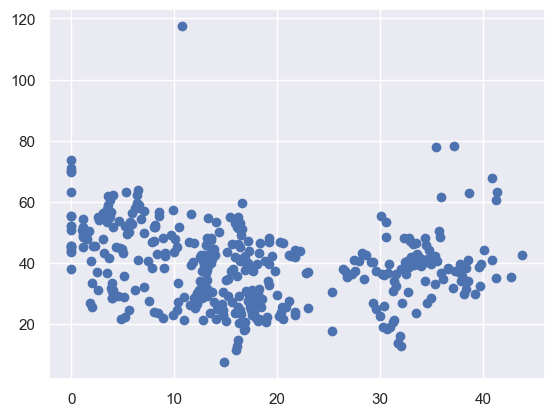

In [505]:
plt.scatter(data_2["X2 house age"],data_2["Y house price of unit area"])

C:\Users\Magesh\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


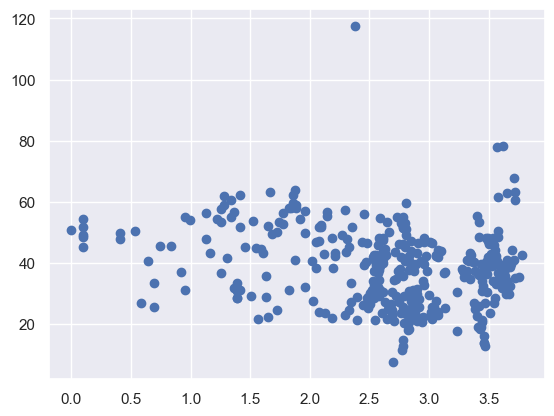

In [506]:
plt.scatter(np.log(data_2["X2 house age"]),data_2["Y house price of unit area"])   ## log of x2 is more linear

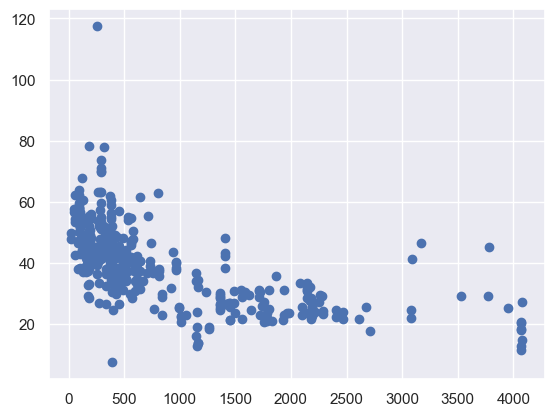

In [507]:
plt.scatter(data_2["X3 distance to the nearest MRT station"],data_2["Y house price of unit area"])

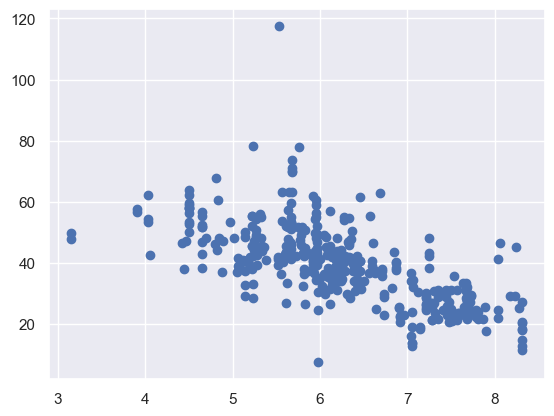

In [508]:
plt.scatter(np.log(data_2["X3 distance to the nearest MRT station"]),data_2["Y house price of unit area"])## log is x3 is more linear

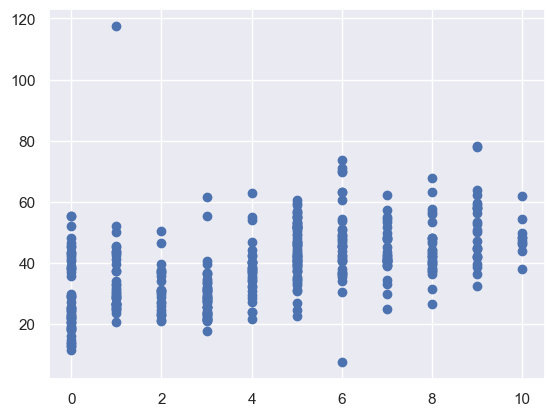

In [509]:
plt.scatter(data_2["X4 number of convenience stores"],data_2["Y house price of unit area"])

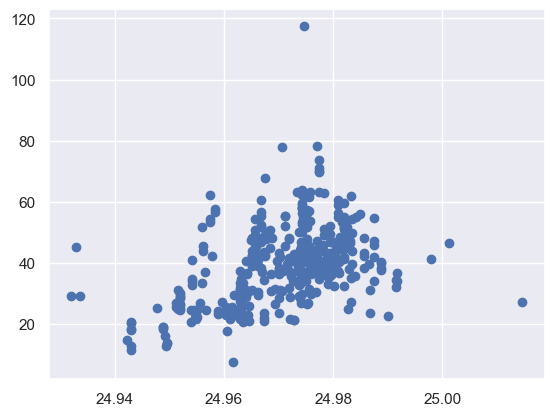

In [510]:
plt.scatter(data_2["X5 latitude"],data_2["Y house price of unit area"])

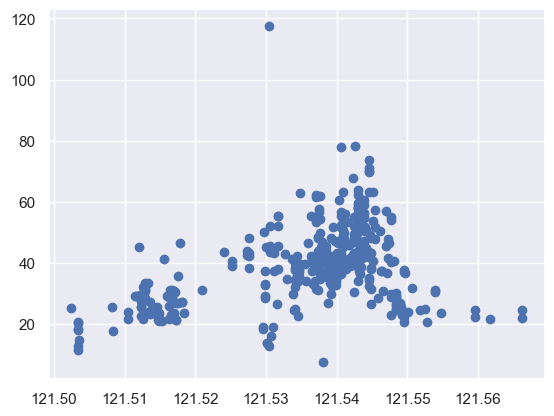

In [511]:
plt.scatter(data_2["X6 longitude"],data_2["Y house price of unit area"])

Log of x2 and x3 is linear

In [512]:
data_2["log_x2_age"]=np.log(data_2["X2 house age"])
data_2.head()

C:\Users\Magesh\AppData\Local\Temp\ipykernel_15108\777922822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2["log_x2_age"]=np.log(data_2["X2 house age"])


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,log_x2_age
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,3.465736
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2.970414
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2.587764
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2.587764
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,1.609438


In [513]:
data_2["log_x3_station"]=np.log(data_2["X3 distance to the nearest MRT station"])
data_2.head()

C:\Users\Magesh\AppData\Local\Temp\ipykernel_15108\2180863885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2["log_x3_station"]=np.log(data_2["X3 distance to the nearest MRT station"])


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,log_x2_age,log_x3_station
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,3.465736,4.441225
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2.970414,5.725527
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2.587764,6.331474
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2.587764,6.331474
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,1.609438,5.967603


In [514]:
data_3=data_2.drop(["X2 house age","X3 distance to the nearest MRT station"],axis=1)
data_3.head()

,X1 transaction date,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,log_x2_age,log_x3_station
0,2012.917,10,24.98298,121.54024,37.9,3.465736,4.441225
1,2012.917,9,24.98034,121.53951,42.2,2.970414,5.725527
2,2013.583,5,24.98746,121.54391,47.3,2.587764,6.331474
3,2013.500,5,24.98746,121.54391,54.8,2.587764,6.331474
4,2012.833,5,24.97937,121.54245,43.1,1.609438,5.967603


### 2. Endogenity is assumed

### 3 . Normality and Homoscedasticity
a) normal -> scaling
b) zero mean -> scaling
c) homoscedasticity is also assumed because of log transformation

### 4. No Autocorrelation
Because it is not a time series or panel data

### 5.Multicollinearity

In [515]:
data_3=data_3.reset_index(drop=True)
data_3.columns.values

array(['X1 transaction date', 'X4 number of convenience stores',
       'X5 latitude', 'X6 longitude', 'Y house price of unit area',
       'log_x2_age', 'log_x3_station'], dtype=object)

In [516]:
data_3.describe()

,X1 transaction date,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,log_x2_age,log_x3_station
count,389.000000,389.000000,389.000000,389.00000,389.000000,389.000000,389.000000
mean,2013.148476,4.334190,24.970484,121.53578,39.344730,-inf,6.260565
std,0.281632,2.874773,0.011266,0.01217,12.861805,NaN,1.023524
min,2012.667000,0.000000,24.932070,121.50243,7.600000,-inf,3.152002
25%,2012.917000,2.000000,24.963570,121.53119,29.500000,2.116256,5.661579
50%,2013.167000,5.000000,24.972290,121.53964,39.600000,2.766319,6.179516
75%,2013.417000,6.000000,24.978410,121.54348,47.100000,3.339322,7.142614
max,2013.583000,10.000000,25.014590,121.56627,117.500000,3.779634,8.313710


In [517]:
data_4=data_3[data_3["log_x2_age"]>0]
data_4.describe()

,X1 transaction date,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,log_x2_age,log_x3_station
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,2013.154558,4.358491,24.970447,121.535686,38.636388,2.655504,6.297600
std,0.280601,2.853789,0.011449,0.012383,12.530937,0.805864,1.032666
min,2012.667000,0.000000,24.932070,121.502430,7.600000,0.095310,3.152002
25%,2012.917000,2.000000,24.963455,121.530855,29.300000,2.322340,5.667550
50%,2013.167000,5.000000,24.972540,121.539660,39.000000,2.785011,6.198949
75%,2013.417000,7.000000,24.978860,121.543480,46.600000,3.377588,7.215342
max,2013.583000,10.000000,25.014590,121.566270,117.500000,3.779634,8.313710


In [518]:
data_4.columns.values

array(['X1 transaction date', 'X4 number of convenience stores',
       'X5 latitude', 'X6 longitude', 'Y house price of unit area',
       'log_x2_age', 'log_x3_station'], dtype=object)

In [519]:
data_4.head()

,X1 transaction date,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,log_x2_age,log_x3_station
0,2012.917,10,24.98298,121.54024,37.9,3.465736,4.441225
1,2012.917,9,24.98034,121.53951,42.2,2.970414,5.725527
2,2013.583,5,24.98746,121.54391,47.3,2.587764,6.331474
3,2013.500,5,24.98746,121.54391,54.8,2.587764,6.331474
4,2012.833,5,24.97937,121.54245,43.1,1.609438,5.967603


In [520]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_4[["log_x3_station","X4 number of convenience stores"]]
## Only these variables we are considering
## Because including any other variables results in multicollinearity
vif=pd.DataFrame()
vif["Features"]=variables.columns
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["VIF"]=vif["VIF"].round(1)
vif

,Features,VIF
0,log_x3_station,2.4
1,X4 number of convenience stores,2.4


In [521]:
data_preprocessed=data_4[["log_x3_station","X4 number of convenience stores"]]
data_preprocessed

,log_x3_station,X4 number of convenience stores
0,4.441225,10
1,5.725527,9
2,6.331474,5
3,6.331474,5
4,5.967603,5
...,...,...
384,7.685126,3
385,4.504864,9
386,5.968630,7
387,4.652150,5


## Regression

In [522]:
y=data_4["Y house price of unit area"]
x=data_preprocessed

## Scaling the model

In [523]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x_scaled=scaler.transform(x)
x_scaled

array([[-1.80007997,  1.97951862],
       [-0.55472487,  1.62863405],
       [ 0.03284711,  0.22509576],
       [ 0.03284711,  0.22509576],
       [-0.31998951,  0.22509576],
       [ 1.34513048, -0.47667338],
       [ 0.13352973,  0.92686491],
       [-0.616733  ,  0.57598034],
       [ 1.15251028, -0.47667338],
       [-0.28429508, -1.17844253],
       [-1.73837025,  1.62863405],
       [-0.09565954,  0.22509576],
       [ 1.46831014, -0.12578881],
       [ 0.73960706, -0.12578881],
       [ 0.06211955, -0.82755795],
       [-0.42397747, -1.17844253],
       [-0.37734563,  1.27774948],
       [-3.05020595,  0.92686491],
       [ 1.38907906, -0.47667338],
       [-0.64557994,  0.92686491],
       [ 0.88991136, -1.17844253],
       [-0.64557994,  0.92686491],
       [-0.11865066, -0.12578881],
       [ 0.97694675, -0.82755795],
       [-0.33678326,  0.22509576],
       [-0.65508651,  0.22509576],
       [ 0.02504003, -0.12578881],
       [-0.17996398,  0.22509576],
       [ 0.33746179,

### Train test split

In [524]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [525]:
reg=LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_train,y_train)

0.45292693425022046

In [526]:
reg.intercept_

38.755040579952514

In [527]:
reg.coef_

array([-7.40637031,  1.4380909 ])

In [528]:
y_hat_train=reg.predict(x_train)
y_hat_train

array([42.2910915 , 42.59319328, 50.89598902, 28.10700648, 43.38732194,
       30.46932006, 29.13764887, 44.15110568, 46.68421684, 39.92680228,
       28.84948439, 45.32187011, 45.40495528, 24.099004  , 35.75273783,
       43.7052599 , 40.71257719, 38.59320472, 25.85945954, 41.85600609,
       40.44240634, 35.65310123, 62.67891135, 40.25642602, 41.5730903 ,
       23.88489012, 53.07547119, 43.6036222 , 43.6036222 , 41.44870954,
       50.89598902, 40.77567536, 28.1046493 , 28.69823138, 48.9754442 ,
       38.07455381, 35.66383372, 29.74693402, 44.86936069, 33.09634104,
       22.31176348, 35.24833417, 27.78150705, 29.74693402, 43.6036222 ,
       35.22256204, 47.24385288, 41.03566001, 47.07439078, 43.6036222 ,
       47.70148918, 36.61679282, 56.20571737, 38.35509418, 35.65310123,
       29.29982429, 41.91910721, 50.89598902, 41.5730903 , 39.46092781,
       39.09898596, 30.19595617, 42.59319328, 53.97217823, 41.44870954,
       30.38552818, 27.6992962 , 44.17710624, 33.22324349, 31.11

C:\Users\Magesh\AppData\Local\Temp\ipykernel_15108\1417203692.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


<AxesSubplot:xlabel='Y house price of unit area', ylabel='Density'>

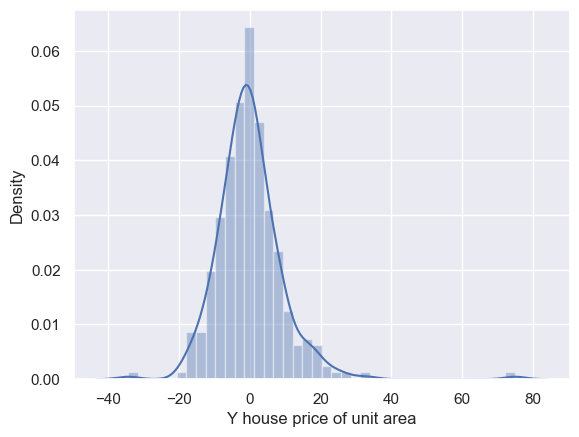

In [529]:
error=y_train-y_hat_train
sns.distplot(error)

In [530]:
x_train

array([[-0.36559593,  0.57598034],
       [-0.33825431,  0.92686491],
       [-1.59555083,  0.22509576],
       [ 1.34513048, -0.47667338],
       [-0.37734563,  1.27774948],
       [ 0.88991136, -1.17844253],
       [ 1.13784321, -0.82755795],
       [-0.616733  ,  0.57598034],
       [-0.89061983,  0.92686491],
       [-0.11450326,  0.22509576],
       [ 1.17675086, -0.82755795],
       [-0.6385462 ,  1.27774948],
       [-1.12668174, -1.17844253],
       [ 1.68189338, -1.5293271 ],
       [ 0.38094328, -0.12578881],
       [-0.3521422 ,  1.62863405],
       [-0.15246666,  0.57598034],
       [-0.20696664, -1.17844253],
       [ 1.4441986 , -1.5293271 ],
       [-0.23872011,  0.92686491],
       [-0.45664382, -1.17844253],
       [ 0.39439611, -0.12578881],
       [-3.05020595,  0.92686491],
       [-0.15900869,  0.22509576],
       [-0.33678326,  0.22509576],
       [ 1.7108028 , -1.5293271 ],
       [-1.54916678,  1.97951862],
       [-0.61094345,  0.22509576],
       [-0.61094345,

In [531]:
percentage=np.absolute(error/y_train)*100
percentage.reset_index(drop=True)
percentage

203     3.654636
77      2.532738
88      1.745195
377     1.469337
17      2.570501
         ...    
73      3.958440
112    17.109919
283    19.583270
366    24.227730
108    23.780900
Name: Y house price of unit area, Length: 296, dtype: float64

In [532]:
summary=pd.DataFrame(columns=[["Target","Predicted Price","Error","Error %"]])
summary["Target"]=y_train
summary["Predicted Price"]=y_hat_train
summary["Error"]=error
summary["Error %"]=percentage
summary.reset_index(drop=True)

,Target,Predicted Price,Error,Error %
0,40.8,42.291092,-1.491092,3.654636
1,43.7,42.593193,1.106807,2.532738
2,51.8,50.895989,0.904011,1.745195
3,27.7,28.107006,-0.407006,1.469337
4,42.3,43.387322,-1.087322,2.570501
...,...,...,...,...
291,40.3,38.704749,1.595251,3.958440
292,48.0,39.787239,8.212761,17.109919
293,23.2,27.743319,-4.543319,19.583270
294,67.7,51.297827,16.402173,24.227730


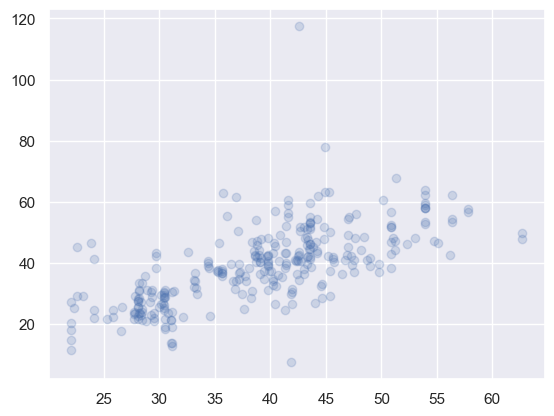

In [533]:
plt.scatter(y_hat_train,y_train,alpha=0.2)

In [534]:
summary.describe()

,Target,Predicted Price,Error,Error %
count,296.000000,296.000000,2.960000e+02,296.000000
mean,38.967905,38.967905,3.012605e-15,19.153263
std,12.713501,8.556167,9.403463e+00,31.570642
min,7.600000,22.076495,-3.430398e+01,0.016546
25%,29.475000,30.961966,-5.189697e+00,5.516150
50%,39.400000,39.787239,-7.113847e-01,13.134968
75%,46.625000,43.885216,4.012052e+00,23.925898
max,117.500000,62.678911,7.493941e+01,451.368146


In [535]:
y_hat_test=reg.predict(x_test)
y_hat_test

array([28.33183895, 28.44217027, 40.20046722, 28.08980759, 32.20428285,
       33.44539158, 29.98119458, 32.10771497, 41.55344273, 37.89507535,
       28.19890314, 39.99802198, 41.73319362, 28.1042103 , 48.98762875,
       29.61484164, 54.93382716, 27.74331865, 41.44870954, 50.13648637,
       39.16592774, 30.18616136, 42.19210587, 39.92680228, 53.97217823,
       22.09911933, 29.22327157, 40.77313572, 39.78723876, 53.97217823,
       43.93056201, 44.86936069, 42.23042322, 39.92680228, 34.44987982,
       40.69560883, 36.88438785, 39.45291558, 40.73905057, 32.20428285,
       47.34591999, 36.64262058, 43.30294726, 41.96705322, 46.99411819,
       43.6036222 , 45.39867959, 38.70474855, 28.10700648, 28.62489226,
       22.09911933, 50.89598902, 44.17710624, 37.90615239, 43.51872848,
       34.43017682, 48.15579193, 38.83547093, 27.9199954 , 22.09911933,
       48.54767766, 29.31892501, 29.72435901, 31.07585384, 31.78876073,
       49.28602611, 33.44539158, 39.20731349, 45.64390364, 31.19

C:\Users\Magesh\AppData\Local\Temp\ipykernel_15108\2800189496.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error_test)


<AxesSubplot:xlabel='Y house price of unit area', ylabel='Density'>

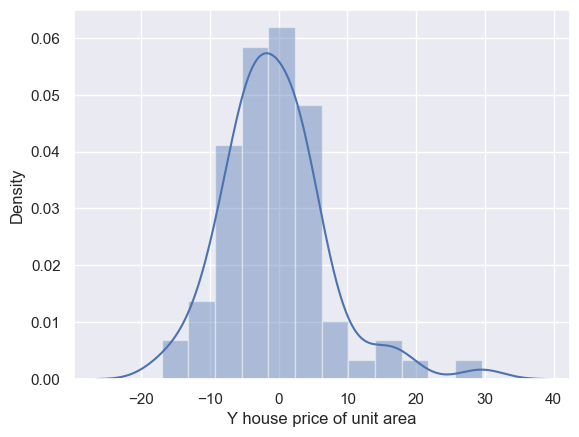

In [536]:
error_test=y_test-y_hat_test
sns.distplot(error_test)

The model is only 45% accurate because we missed some important variable
or some variable not present such as 'size'